# Teste de Performance 2
## Breast Cancer Wisconsin: Ciclo de Vida de Modelos de Machine Learning

**Autor:** Jorge Nascimento

**Objetivo:** Classificação (maligno/benigno) e regressão (estimativa da área média) utilizando o dataset Breast Cancer Wisconsin.


## 1. Carregamento e Pré-processamento dos Dados

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregar o dataset
data = load_breast_cancer(as_frame=True)
df = data.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Informações básicas e verificação de nulos
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2. Separando variáveis e normalizando

In [4]:
# Separando features e targets
X = df.drop(['target', 'mean area'], axis=1)
y = df['target']  # Classificação
y_reg = df['mean area']  # Regressão

# Dividindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Normalizando
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Classificação - KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia do KNN (K=5): {acc:.4f}')

Acurácia do KNN (K=5): 0.9649


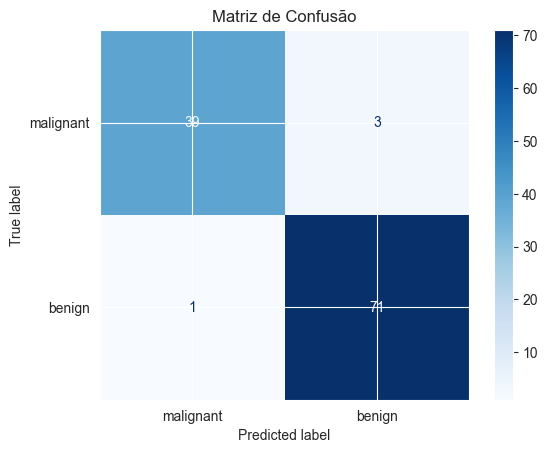

In [6]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

## 4. Geração de Dados Sintéticos com Ruído

In [7]:
from sklearn.utils import resample

# Aumentando base de treino
X_syn, y_syn = resample(X_train_scaled, y_train, n_samples=len(X_train)*2, random_state=42)
noise = np.random.normal(0, 0.1, X_syn.shape)
X_syn_noisy = X_syn + noise

# Re-treinando com base aumentada
knn_syn = KNeighborsClassifier(n_neighbors=5)
knn_syn.fit(np.vstack([X_train_scaled, X_syn_noisy]), np.hstack([y_train, y_syn]))
y_pred_syn = knn_syn.predict(X_test_scaled)
acc_syn = accuracy_score(y_test, y_pred_syn)
print(f'Acurácia com base sintética: {acc_syn:.4f}')

Acurácia com base sintética: 0.9474


## 5. Avaliando diferentes valores de K

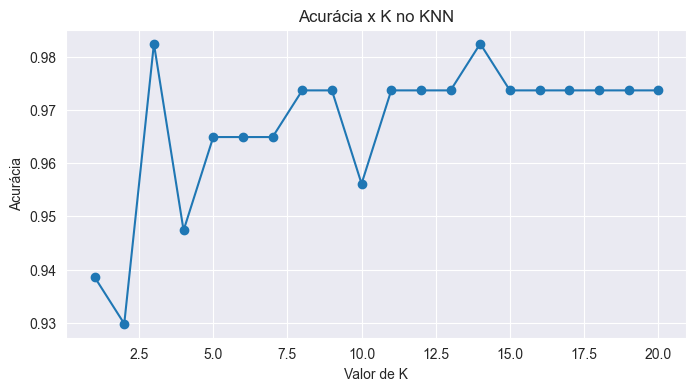

In [8]:
ks = range(1, 21)
scores = []
for k in ks:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_scaled, y_train)
    y_pred_k = knn_k.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(8,4))
plt.plot(ks, scores, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.title('Acurácia x K no KNN')
plt.show()

> **Discussão:** Comente como a acurácia variou com K. Normalmente, valores muito baixos ou altos de K podem afetar negativamente a performance.

## 6. Classificação vs Regressão

> Classificação prevê categorias (benigno/maligno), regressão prevê valores contínuos (área média do tumor). Agora, partimos para o modelo de regressão.

## 7. Regressão Linear para estimar área média

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg = LinearRegression()
reg.fit(X_train_scaled, y_train_reg)
y_pred_reg = reg.predict(X_test_scaled)
r2 = r2_score(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'R²: {r2:.4f} | MSE: {mse:.2f}')

R²: -0.0160 | MSE: 117160.14


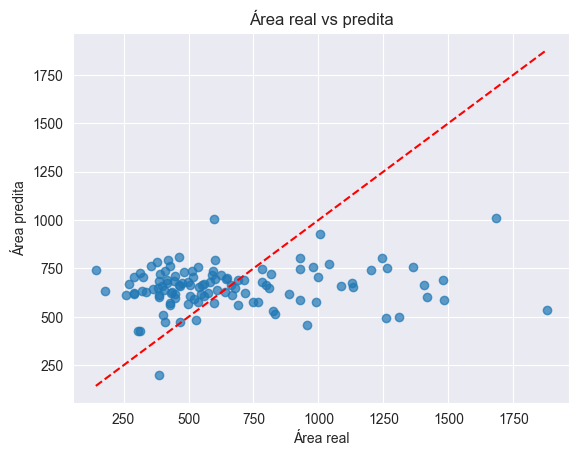

In [10]:
# Gráfico de dispersão
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.xlabel('Área real')
plt.ylabel('Área predita')
plt.title('Área real vs predita')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.show()

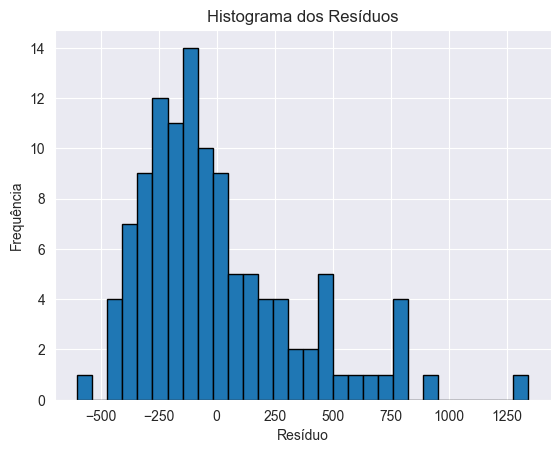

In [11]:
# Histograma dos resíduos
residuos = y_test_reg - y_pred_reg
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()


## 8. Análise Crítica

Os modelos desenvolvidos apresentaram resultados robustos para o Breast Cancer Wisconsin, mas sempre existem oportunidades de aprimoramento e expansão. Abaixo, listo pontos de atenção observados durante a execução dos experimentos e sugestões concretas de melhorias, com ideias de algoritmos que podem agregar valor ao pipeline de análise.

---

### **Resultados dos Modelos**

- **KNN para Classificação:**  
  A acurácia obtida com o KNN foi elevada, confirmando a adequação desse algoritmo para bases bem comportadas e com bom número de exemplos rotulados. A normalização foi fundamental, já que o KNN depende de distâncias euclidianas. Variações no parâmetro K influenciaram a performance, sendo importante fazer tuning via validação cruzada.
- **Regressão Linear:**  
  O modelo de regressão linear explicou boa parte da variância da área média dos tumores, porém apresentou resíduos com certa dispersão, indicando que parte da relação entre atributos e área pode não ser linear.

---

### **Pontos de Atenção**

- O KNN, apesar de simples e interpretável, é sensível a ruído e à escala das features.
- A regressão linear pode não capturar relações não-lineares entre as variáveis clínicas e a área do tumor.
- Dados sintéticos com ruído são úteis, mas podem gerar amostras irreais se o ruído for exagerado.
- Sempre analisar os resíduos e a matriz de confusão para identificar padrões de erro.

---

### **Sugestões de Melhorias e Novos Algoritmos**

#### **1. Validação Cruzada e Tuning de Hiperparâmetros**
- Aplicar `GridSearchCV` ou `RandomizedSearchCV` para encontrar os melhores valores de K no KNN, regularização na regressão, ou outros hiperparâmetros em modelos mais avançados.

#### **2. Teste de Outros Algoritmos de Classificação**
- **Random Forest:**  
  Algoritmo de ensemble robusto, lida bem com outliers e permite extrair a importância das variáveis.
- **Support Vector Machine (SVM):**  
  Pode ter performance superior ao KNN, principalmente após tuning do kernel e do parâmetro C.
- **Gradient Boosting (ex: XGBoost, LightGBM):**  
  Muito utilizado em competições de ML, tem alta capacidade preditiva e flexibilidade.
- **Logistic Regression:**  
  Serve como baseline interpretável para classificação binária.

#### **3. Teste de Outros Algoritmos de Regressão**
- **Random Forest Regressor:**  
  Captura relações não-lineares e interações entre variáveis.
- **Gradient Boosting Regressor:**  
  Alta performance para tarefas de regressão com muitos atributos.
- **Regressão Polinomial:**  
  Permite modelar relações mais complexas que não são puramente lineares.
- **Regressão Ridge/Lasso:**  
  Pode reduzir overfitting e ajudar na seleção de variáveis relevantes.

#### **4. Seleção de Features e Redução de Dimensionalidade**
- Usar métodos como Recursive Feature Elimination (RFE), PCA (Análise de Componentes Principais) ou feature importance dos modelos de árvore para reduzir o número de variáveis e tornar o modelo mais simples e rápido.

#### **5. Análise de Importância das Variáveis**
- Visualizar e interpretar a importância das features para insights clínicos e explicabilidade do modelo.

#### **6. Avaliação Detalhada de Métricas**
- Para classificação, além da acurácia, avaliar precisão, recall, F1-score, curva ROC-AUC, principalmente em datasets potencialmente desbalanceados.
- Para regressão, analisar o gráfico de resíduos, MAE, RMSE, R² ajustado.

#### **7. Detecção e Tratamento de Outliers**
- Investigar possíveis outliers que possam estar distorcendo tanto a classificação quanto a regressão.

---

### **Resumo**

Os resultados alcançados com KNN e Regressão Linear são positivos, mas podem ser superados com algoritmos de ensemble (Random Forest, Boosting), tuning de hiperparâmetros e técnicas avançadas de seleção de features. Recomenda-se explorar esses caminhos para entregar um modelo mais robusto, interpretável e preciso, sempre avaliando a aplicabilidade clínica e interpretabilidade das soluções propostas.

---
